In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from collections import defaultdict

In [3]:
res=defaultdict(lambda : defaultdict(dict))

In [9]:
res["work95"]["1src"]["1rnd"] = pd.read_csv("i_bird_n_95_1src_1rnd_aucs.csv")

In [4]:
res["work95"]["1src"]["lastobs"] = pd.read_csv("i_bird_n_95_1src_lastobs_aucs.csv")

In [11]:
res["work95"]["2src"]["lastobs"] = pd.read_csv("i_bird_n_95_2src_lastobs_aucs.csv")

In [12]:
res["RRG"]["1src"]["1rnd"] = pd.read_csv("RRG_n_100_1src_1rnd_aucs.csv")

In [5]:
res["RRG"]["1src"]["lastobs"] = pd.read_csv("RRG_n_100_1src_lastobs_aucs.csv")

In [26]:
res["RRG"]["2src"]["lastobs"] = pd.read_csv("RRG_n_100_2src_lastobs_aucs.csv")

In [6]:
res["proximity"]["1src"]["lastobs"] = pd.read_csv("proximity_n_100_1src_lastobs_aucs.csv")

In [7]:
def stats(x):
    return np.nanmean(x), np.nanstd(x)/np.sqrt(np.prod(x.shape)-np.isnan(x).sum())

In [8]:
stats(np.random.randn(2000))

(0.004006734794194579, 0.022047023975948356)

In [9]:
name_conv = dict(zip(res["RRG"]["1src"]["lastobs"].keys(),["BP","ANN","MF","CT"]))
name_conv

{'sib_psus70_psrc2': 'BP',
 'ann_psus07_4lpow_psrc2': 'ANN',
 'ann_psus07_3lpow_psrc2': 'MF',
 'MF': 'CT'}

In [24]:
names_all=dict(zip(["sib_psus70_psrc2","MF","CT"],["BP","MF","CT"]))

In [10]:
stats(np.random.randn(10000))

(0.008416422814559505, 0.009958195540193632)

In [23]:
isann = lambda n: "ann" in n and "_4lpow_" in n

work95 1src lastobs
ann_psus07_4lpow_psrc2
ANN    0.889 \pm 0.005
BP     0.886 \pm 0.005
MF     0.796 \pm 0.007
CT     0.790 \pm 0.006
dtype: object


RRG 1src lastobs
ann_psus07_4lpow_psrc2
ANN    0.707 \pm 0.010
BP     0.710 \pm 0.010
MF     0.704 \pm 0.010
CT     0.685 \pm 0.009
dtype: object


RRG 2src lastobs
ann_psus07_4lpow_psrc2
ANN    0.669 \pm 0.009
BP     0.671 \pm 0.009
MF     0.671 \pm 0.009
CT     0.659 \pm 0.008
dtype: object


proximity 1src lastobs
ann_psus07_4lpow_psrc2
ANN    0.733 \pm 0.010
BP     0.732 \pm 0.010
MF     0.724 \pm 0.009
CT     0.711 \pm 0.008
dtype: object




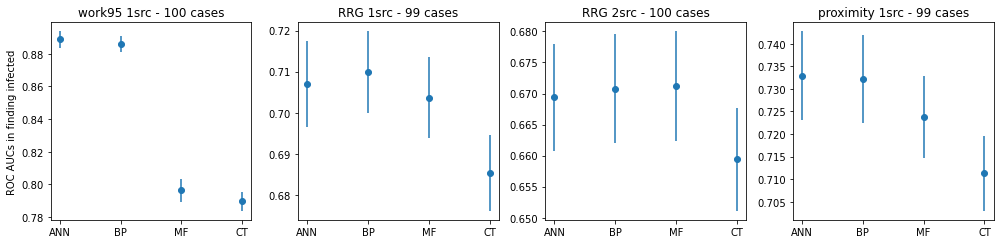

In [41]:
fig, axs = plt.subplots(1,4, figsize=(14,3.5))
axis = axs.flatten()
axs_idx = 0
for net, d1 in res.items():
    for src, d2 in d1.items():
        for obs, vals in d2.items():
            #print(len(vals))
            
            print("{} {} {}".format(net, src, obs))
            meanvar = vals.agg(stats)#.rename(columns=name_conv)
            keys = meanvar.keys()
            try:
                ANN_key = next(filter(isann, keys))
            except StopIteration as f:
                raise ValueError("Cannot find key for ANN") from f
            print(ANN_key)
            names_new = {ANN_key:"ANN"}
            names_new.update(names_all)
            meanvar = meanvar[names_new.keys()].rename(columns=names_new)
            
            v = meanvar.T
            print(
            meanvar.apply(lambda x: "{:5.3f} \pm {:5.3f}".format(x[0], x[1]), axis=0)
            )
            maxis = axis[axs_idx]
            x_pos=range(len(v))
            maxis.errorbar(x_pos, v[0], yerr=v[1], fmt="o")
            maxis.set_xticks(x_pos)
            maxis.set_xticklabels(v.index, rotation=0)
            maxis.set_title("{} {} - {} cases".format(net, src, #obs, 
                                                      len(vals)))
            #print(v.apply())
            axs_idx+=1
            print("\n")
axis[0].set_ylabel("ROC AUCs in finding infected")
plt.tight_layout()
fig.savefig("Avg_auc.svg", bbox_inches="tight")

In [ ]:
fig.savefig()

In [20]:
maxis.set_xticklabels

,0,1
sib_psus60,0.668750,0.000874
ann_psus06_4lpow,0.662903,0.000890
MF,0.671186,0.000882
CT,0.659430,0.000832


In [46]:
meanvar.apply(lambda x: "{:5.4f} \pm {:5.4f}".format(x[0], x[1]), axis=0)

sib_psus60          0.6688 \pm 0.0009
ann_psus06_4lpow    0.6629 \pm 0.0009
MF                  0.6712 \pm 0.0009
CT                  0.6594 \pm 0.0008
dtype: object

In [44]:
np.mean(vals["sib_psus60"])

0.8776183260877327

In [45]:
np.std(vals["sib_psus60"])/len(vals)

0.0004951556291758689

In [43]:
vals = res["work95"]["2src"]["lastobs"]